In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [12]:
#paths to the dataset folders
dataset_path = "Variant-a(Multiclass classification)"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")


In [13]:
#create data generators for train and validation datasets
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

#load datasets from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3140 images belonging to 8 classes.
Found 900 images belonging to 8 classes.


In [4]:
#initialize the VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#determine the number of classes in the dataset
num_classes = len(train_generator.class_indices)

#add custom layers for transfer learning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

#create the model for transfer learning
model = Model(inputs=base_model.input, outputs=predictions)

#freeze the layers of the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

In [5]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
#save the best model during training
checkpoint = ModelCheckpoint('final_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

#train
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

print("Model training complete. Saved as 'final_model.keras'.")

Epoch 1/15


c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.4753 - loss: 1.9570 - val_accuracy: 0.6644 - val_loss: 0.9136
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.6643 - loss: 0.9271 - val_accuracy: 0.6989 - val_loss: 0.8116
Epoch 3/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.7154 - loss: 0.7633 - val_accuracy: 0.7067 - val_loss: 0.8447
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.7534 - loss: 0.6852 - val_accuracy: 0.7211 - val_loss: 0.7123
Epoch 5/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.7561 - loss: 0.6441 - val_accuracy: 0.7811 - val_loss: 0.6258
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.8010 - loss: 0.5674 - val_accuracy: 0.8000 - val_loss: 0.5864
Epoch 7/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.8145 - loss: 0.5190 - val_accuracy: 0.7922 - val_loss: 0.6085
Epoch 8/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.8121 - loss: 0.5166 - val_accuracy: 0.7611 - val_loss: 0.

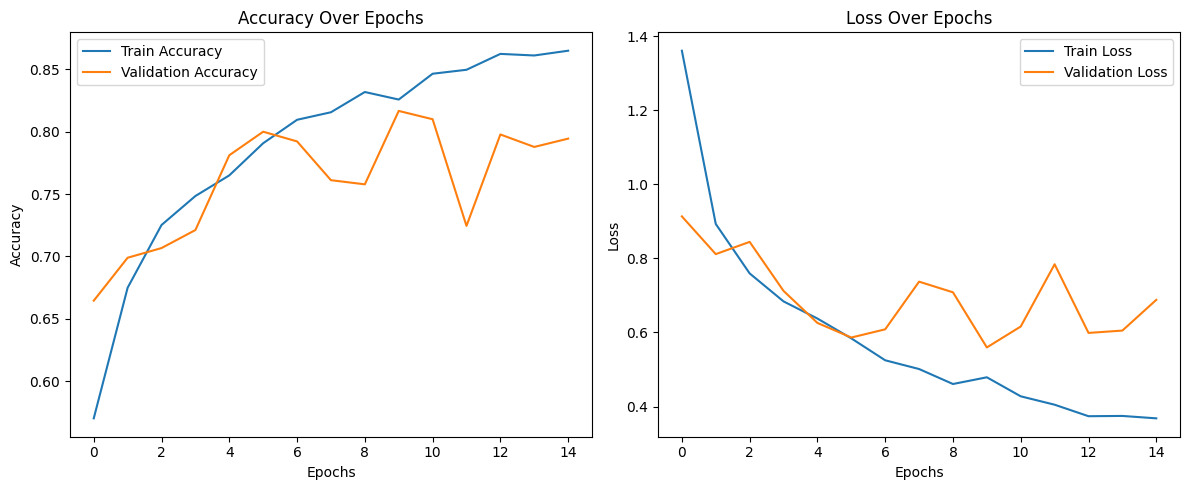

In [7]:
#plot accuracy and loss
plt.figure(figsize=(12, 5))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()